In [1]:
import os
import pandas as pd
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from PIL import Image
import urllib.request
from torch_snippets import *
from keras.applications.imagenet_utils import preprocess_input
from image_similarity import *

In [2]:
test_data = pd.read_csv('test_data.csv')
test_data.drop(columns=['mpn', 'page_name', 'lang', 'brand', 'ean', 'bucket', 'string_length', 'product_id'], inplace=True)
test_data.head()

,ptitle,img,target_img
0,LG F4V310WSE 10.5Kg Washing Machine,https://www.reliantdirect.co.uk/pub/media/cata...,https://www.lg.com/uk/images/washing-machines/...
1,"LG OLED55CX5LB, 55 inch 4K Ultra HD OLED TV wi...",NaN,https://www.lg.com/uk/images/tvs/md07500962/ga...
2,"LG 65NANO866NA 65"" 4K Ultra HD NanoCell Smart ...",https://cdn.hughes.co.uk/live/media/image/30/7...,https://www.lg.com/uk/images/tvs/md07501256/ga...
3,"Samsung QE65Q75T 65"" QLED 4K HDR Smart TV",https://www.beyondtelevision.co.uk/pub/media/c...,https://images.samsung.com/is/image/samsung/uk...
4,LG OLED88Z19LA 8K SIGNATURE TV | Tekzone,//d2o7dtsnwzl7g9.cloudfront.net/tekzone/media/...,https://www.lg.com/uk/images/tvs/md07523665/ga...


In [3]:
def download_images(img_url, save_location):
    # Download images/Save images in the 'images' folder
    os.makedirs('images', exist_ok=True)
    if np.nan is img_url:  return 0
    if 'http' not in img_url: img_url = 'https:' + img_url
    urllib.request.urlretrieve(img_url, 'images/' + save_location)
    return 0

def preprocess(): 
    # Load images in the images folder into array
    cwd_path = os.getcwd()
    data_path =cwd_path + '/images'
    data_dir_list = os.listdir(data_path)

    img_data_list=[]
    for dataset in data_dir_list:
        img_path = data_path + '/'+ dataset
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        img_data_list.append(x)
    return img_data_list
        
def calculate_similarity(img_data_list):
    image_similarity_cosine = calculate_similarity_cosine(get_feature_vector_fromPIL(img_data_list[0]), get_feature_vector_fromPIL(img_data_list[1]))
    print("image similarity: {:.2f}%".format(image_similarity_cosine[0][0]*100))

Product 1


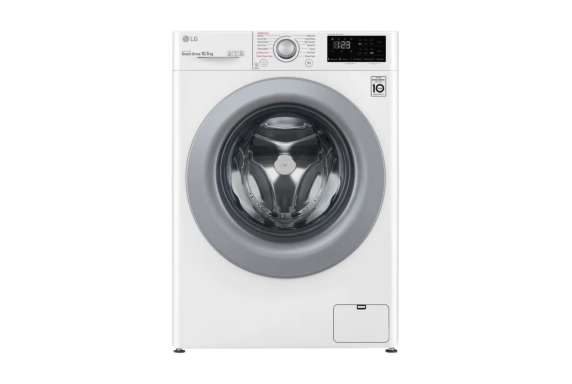

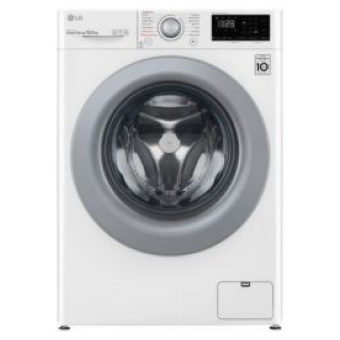

image similarity: 86.87%
Product 2


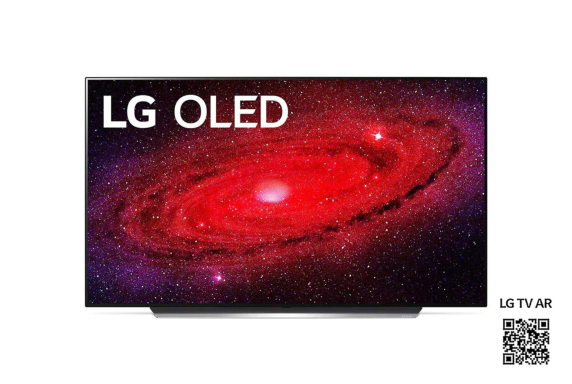

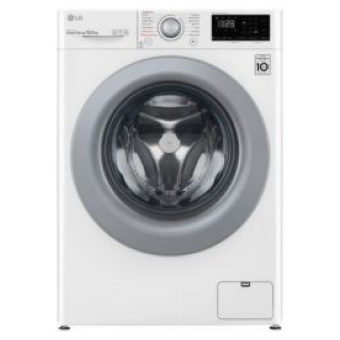

image similarity: 30.65%
Product 3


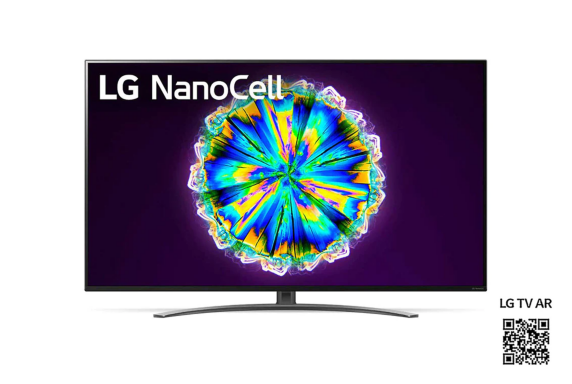

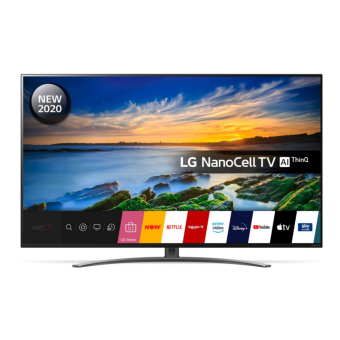

image similarity: 49.12%
Product 4


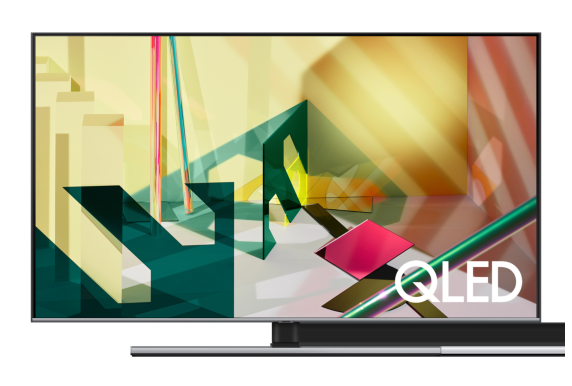

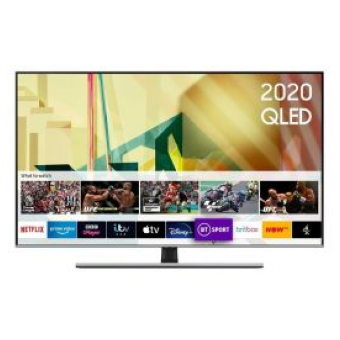

image similarity: 49.70%
Product 5


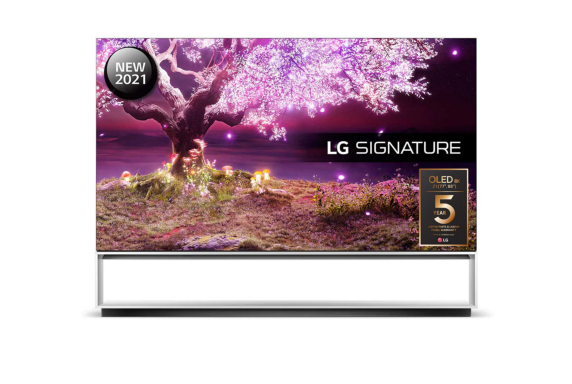

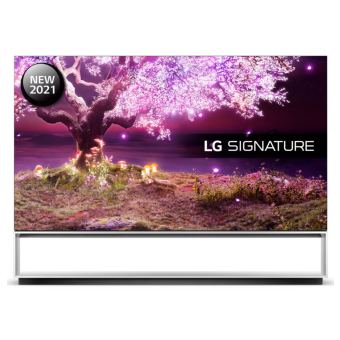

image similarity: 73.17%
Product 6


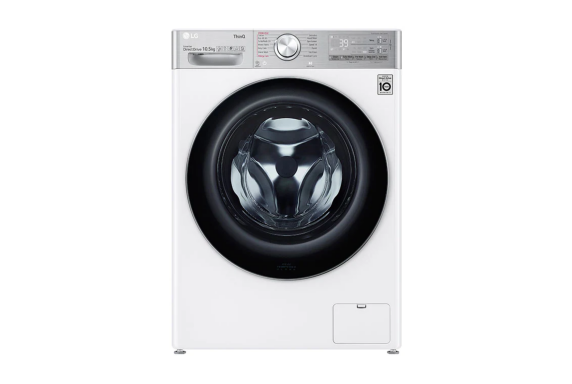

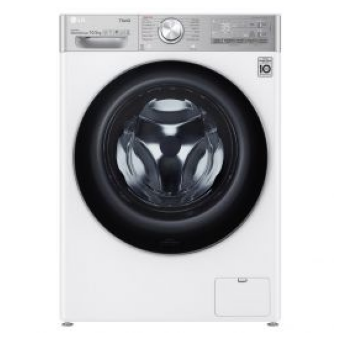

image similarity: 81.77%
Product 7


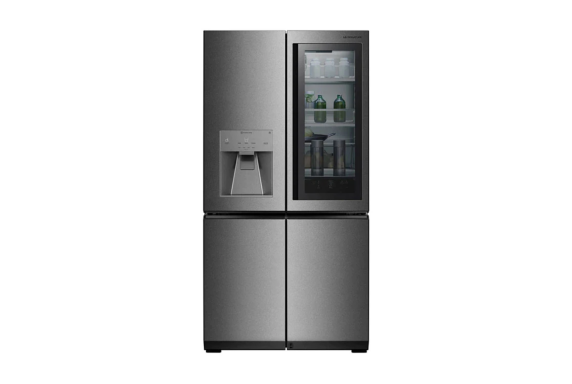

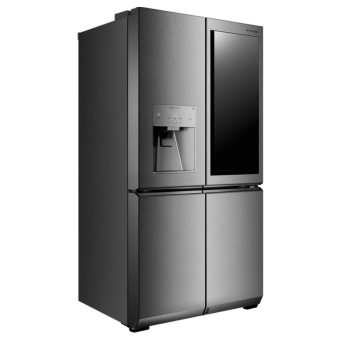

image similarity: 74.97%
Product 8


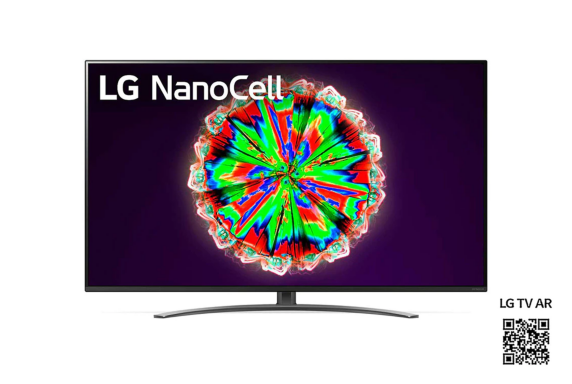

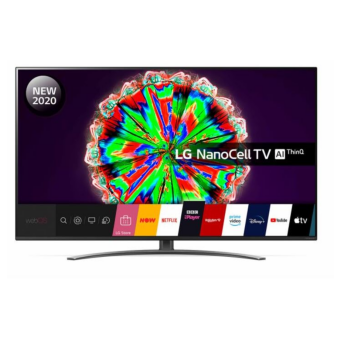

image similarity: 62.13%
Product 9


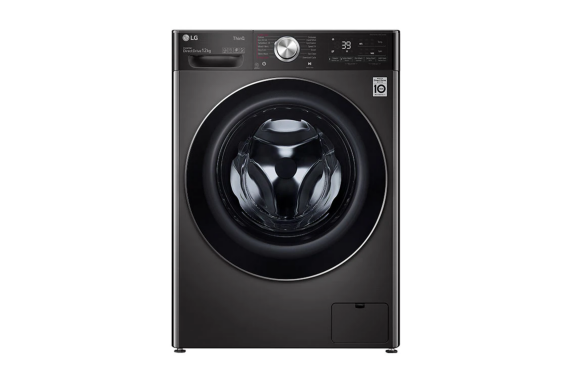

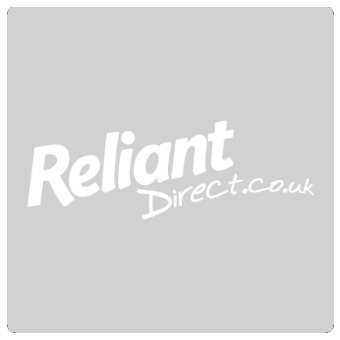

image similarity: 26.33%
Product 10


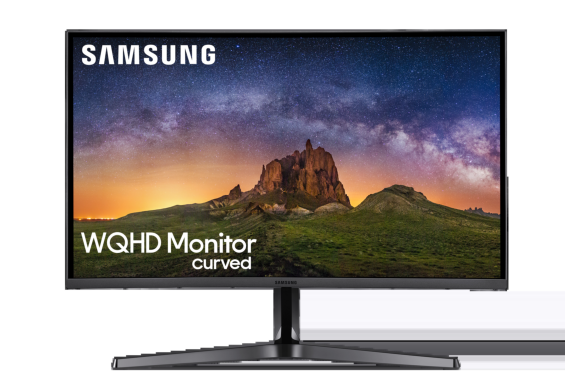

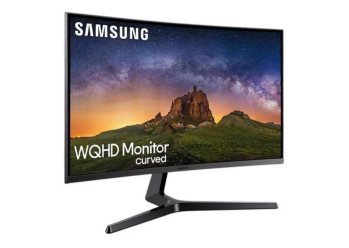

image similarity: 76.74%


In [10]:
for i, row in test_data.iterrows():
    print(f'Product {i+1}')
    target_img, source_img = row['target_img'], row['img']
    download_images(target_img, 'Image1.png'), download_images(source_img, 'Image2.png')
    show('images/Image1.png', sz=10)
    show('images/Image2.png', sz=6)
    img_data_list = preprocess()
    calculate_similarity(img_data_list)